In [146]:
import numpy as np #支援高階大量的維度陣列與矩陣運算，此外也針對陣列運算提供大量的數學函式函式庫
import matplotlib.pyplot as plt #用於表示及可視覺化數據
import pandas as pd #資料處理模組

In [147]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values #基於行索引和列索引（index，columns） 都是從 0 開始
y = dataset.iloc[:, -1].values

In [148]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [149]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [150]:
from sklearn.impute import SimpleImputer #數據填充
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #對於每一列來說，如果是mean，由該列的平均來填充
imputer.fit(X[:, 1:3]) #對特徵集 X 進行分析擬合
X[:, 1:3] = imputer.transform(X[:, 1:3]) #填充 X 的值
#https://kknews.cc/zh-tw/code/g5qoogm.html

In [151]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [152]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')#變換器的名字、獨熱編碼、被應用的列、passthrough表示透傳，不對column指定的列做任何轉換
X = np.array(ct.fit_transform(X))

In [153]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #標籤編碼，簡化文字，簡化儲存空間，簡化運算過程中所需消耗的硬體資源
y = le.fit_transform(y)

In [155]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [163]:
from sklearn.model_selection import train_test_split #從樣本中隨機的按比例選取train_data和test_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)#所要劃分的樣本特徵集、所要劃分的樣本結果、樣本的數量(占比)、該組隨機數的編號，每次都填1，其他引數一樣的情況下你得到的隨機陣列是一樣的

In [164]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [165]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [166]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [167]:
print(y_test)

[0 1]


In [168]:
from sklearn.preprocessing import StandardScaler #計算訓練數據的均值和標準差
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [169]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [170]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


In [171]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [172]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [174]:
from sklearn.linear_model import LinearRegression #將複雜的資料數據，擬和至一條直線上，就能方便預測未來的資料
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
y_pred = regressor.predict(X_test)#預測

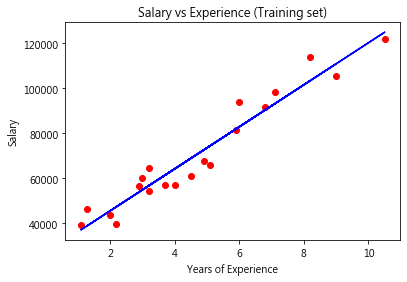

In [180]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

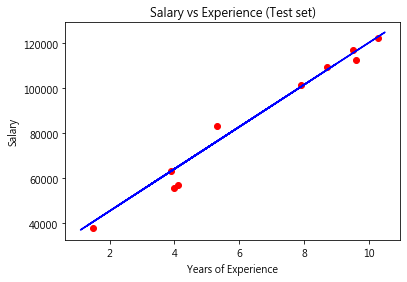

In [181]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()